In [1]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
os.chdir("/content/gdrive/My Drive")
#dir()
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install netcdf4
!pip install "basemap == 1.3.0b1" "basemap-data == 1.3.0b1" "basemap-data-hires == 1.3.0b1"
!pip install basemap
from netCDF4 import Dataset
from netCDF4 import num2date
from mpl_toolkits.basemap import Basemap
import mpl_toolkits.basemap as basemap
import getpass

Mounted at /content/gdrive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 880 kB 4.3 MB/s 
     |████████████████████████████████| 30.5 MB 1.4 MB/s 
     |████████████████████████████████| 91.1 MB 70 kB/s 
     |████████████████████████████████| 219 kB 59.0 MB/s 
     |████████████████████████████████| 7.7 MB 17.9 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37324 sha256=b4f5eea19731814388f0ff731cded34f7b8ae9d0f4e3cb5f5f280c712d360386
  Stored in directory: /root/.cache/pip/wheels/1f/1b/b5/54affbefc8a7e2bdf1da000fc576b8a1c91338f1f327a04f4c
Successfully built pyshp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Cargar datos

## Viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Humboldt/Data_anual/'
ifile = 'GLOBAL_REANALYSIS_PHY_Viento.nc' # Elegir el archivo .nc
d1_C_W = xr.open_dataset(ifile)
#d1_C_W=d1_C_W.sel(time=filtro_meses(d1_C_W['time.month']))
d1_C_W.lon.values[d1_C_W.lon.values < 0] = d1_C_W.lon.values[d1_C_W.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C_W['lat'].values,d1_C_W['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Viento/Humboldt/Data_anual


In [ ]:
d1_C_W

<xarray.Dataset>
Dimensions:         (time: 9861, lat: 121, lon: 61)
Coordinates:
  * time            (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat             (lat) float32 -45.0 -44.75 -44.5 ... -15.5 -15.25 -15.0
  * lon             (lon) float32 275.0 275.2 275.5 275.8 ... 289.5 289.8 290.0
Data variables:
    eastward_wind   (time, lat, lon) float64 ...
    northward_wind  (time, lat, lon) float64 ...

In [ ]:
tiempos= d1_C_W.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

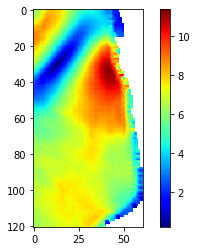

In [ ]:
plt.imshow(np.sqrt(d1_C_W.eastward_wind.values[0,:,:]**2 + d1_C_W.northward_wind.values[0,:,:]**2), cmap='jet')
plt.colorbar()

In [ ]:
#~mask sobre tierra
indices=np.where(~np.isnan(d1_C_W.eastward_wind.values[0,:,:])== True,1, np.nan)
indices

array([[ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       ...,
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan],
       [ 1.,  1.,  1., ..., nan, nan, nan]])

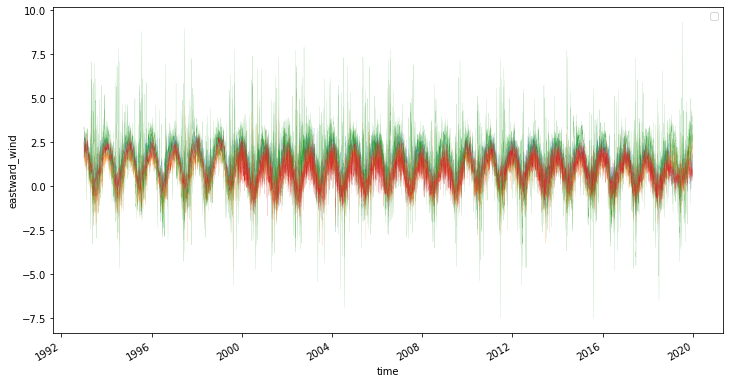

In [ ]:
U_Coquimbo= d1_C_W.sel(lon=-71.5+360,lat=-30).eastward_wind.drop(['lat','lon'])
U_Valparaiso= d1_C_W.sel(lon=-71.75+360,lat=-33).eastward_wind.drop(['lat','lon'])
U_Concepcion= d1_C_W.sel(lon=-73+360,lat=-36.5).eastward_wind.drop(['lat','lon'])
U_Mejillones= d1_C_W.sel(lon=-70.5+360,lat=-22.5).eastward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
U_Coquimbo.plot(linewidth=0.1)
U_Valparaiso.plot(linewidth=0.1)
U_Concepcion.plot(linewidth=0.1)
U_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Coquimbo.to_dataframe(),U_Valparaiso.to_dataframe(),U_Concepcion.to_dataframe(),U_Mejillones.to_dataframe()],axis=1)
df_U.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_U.to_csv('U_Humboldt.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,2.564941,2.139893,3.260010,1.567139
1993-01-02,2.234863,2.082275,3.382324,2.520020
1993-01-03,2.550049,1.717529,2.979980,2.199951
1993-01-04,2.332275,1.660156,2.612305,2.192627
1993-01-05,2.724854,2.372559,3.145020,2.317627


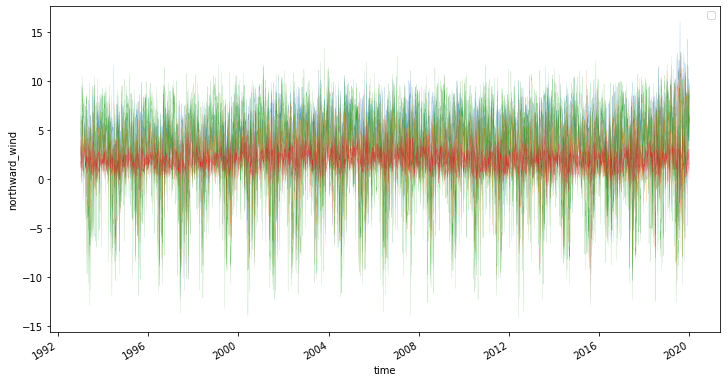

In [ ]:
V_Coquimbo= d1_C_W.sel(lon=-71.5+360,lat=-30).northward_wind.drop(['lat','lon'])
V_Valparaiso= d1_C_W.sel(lon=-71.75+360,lat=-33).northward_wind.drop(['lat','lon'])
V_Concepcion= d1_C_W.sel(lon=-73+360,lat=-36.5).northward_wind.drop(['lat','lon'])
V_Mejillones= d1_C_W.sel(lon=-70.5+360,lat=-22.5).northward_wind.drop(['lat','lon'])
plt.figure(figsize=(12,6))
V_Coquimbo.plot(linewidth=0.1)
V_Valparaiso.plot(linewidth=0.1)
V_Concepcion.plot(linewidth=0.1)
V_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Coquimbo.to_dataframe(),V_Valparaiso.to_dataframe(),V_Concepcion.to_dataframe(),V_Mejillones.to_dataframe()],axis=1)
df_V.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_V.to_csv('V_Humboldt.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,5.195068,4.267334,7.577637,3.205078
1993-01-02,2.692383,1.979980,6.249756,2.317383
1993-01-03,1.547607,1.387695,4.210205,0.915039
1993-01-04,2.722412,3.482422,5.227539,1.770264
1993-01-05,3.979736,4.094971,6.517578,1.617676


In [ ]:
# Hovmoller
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C_W.groupby('lat').mean('lon').eastward_wind.to_dataframe().reset_index()
V_H=d1_C_W.groupby('lat').mean('lon').northward_wind.to_dataframe().reset_index()
U_H.to_csv('Hovmoller_U_Humboldt.csv',sep=',')
V_H.to_csv('Hovmoller_V_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Presion

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/Humboldt/'
ifile = 'Humboldt_Presion_atmosferica.nc' # Elegir el archivo .nc
var = 'sp' # elegir la variable de interes (Pascales)
d1_P = xr.open_dataset(ifile) # filtrar la variable del archivo de interes
d1_P=d1_P.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_P= d1_P[var] #seleccionar variable de interes
d1_P=d1_P.sel(lon=slice(-85,-70),lat=slice(-15,-45)) # recortar el xarray
d1_P=d1_P.reindex(lat=list(reversed(d1_P.lat))) # Invertir valores de lat para qye queden iguales
d1_P=d1_P.assign_coords({"lon": d1_P.lon + 360}) # cambiar coordenadas de lon
#d1_P=d1_P.sel(time=filtro_meses(d1_P['time.month']))
d1_P.values= d1_P.values*indices # masking sobre tierra
d1_P

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_PRESION_ATMOSFERICA/Humboldt


<xarray.DataArray 'sp' (time: 9861, lat: 121, lon: 61)>
array([[[101363.1015625, 101386.6875   , 101401.8671875, ...,
                    nan,            nan,            nan],
        [101390.75     , 101400.59375  , 101426.3203125, ...,
                    nan,            nan,            nan],
        [101411.1875   , 101407.1796875, 101440.9765625, ...,
                    nan,            nan,            nan],
        ...,
        [101240.9140625, 101240.3515625, 101239.8359375, ...,
                    nan,            nan,            nan],
        [101234.84375  , 101234.90625  , 101238.2421875, ...,
                    nan,            nan,            nan],
        [101227.0625   , 101215.4453125, 101224.1953125, ...,
                    nan,            nan,            nan]],

       [[101293.03125  , 101298.0390625, 101293.1328125, ...,
                    nan,            nan,            nan],
        [101291.1015625, 101282.09375  , 101288.4609375, ...,
                    nan,            nan,            nan],
        [101282.53125  , 101259.4296875, 101274.2734375, ...,
                    nan,            nan,            nan],
...
        [101462.0859375, 101458.59375  , 101455.2265625, ...,
                    nan,            nan,            nan],
        [101458.       , 101454.9140625, 101455.8828125, ...,
                    nan,            nan,            nan],
        [101452.3984375, 101437.9921875, 101444.9375   , ...,
                    nan,            nan,            nan]],

       [[101746.9140625, 101770.5703125, 101784.2265625, ...,
                    nan,            nan,            nan],
        [101782.7421875, 101792.40625  , 101816.8125   , ...,
                    nan,            nan,            nan],
        [101811.1015625, 101806.8359375, 101839.21875  , ...,
                    nan,            nan,            nan],
        ...,
        [101419.875    , 101416.6328125, 101413.0625   , ...,
                    nan,            nan,            nan],
        [101415.9453125, 101412.90625  , 101413.34375  , ...,
                    nan,            nan,            nan],
        [101410.3125   , 101395.09375  , 101401.46875  , ...,
                    nan,            nan,            nan]]])
Coordinates:
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0

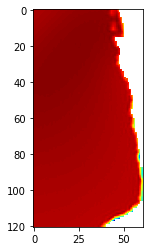

In [ ]:
plt.imshow(d1_P.values[0,:,:],cmap='jet')

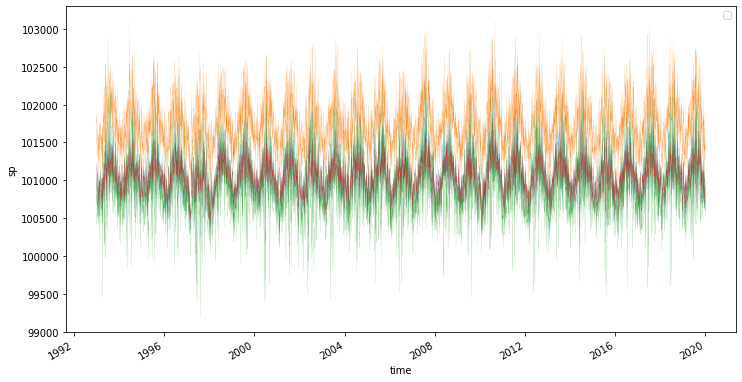

In [ ]:
P_Coquimbo= d1_P.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
P_Valparaiso= d1_P.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
P_Concepcion= d1_P.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
P_Mejillones= d1_P.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
P_Coquimbo.plot(linewidth=0.1)
P_Valparaiso.plot(linewidth=0.1)
P_Concepcion.plot(linewidth=0.1)
P_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_P=pd.concat([P_Coquimbo.to_dataframe(),P_Valparaiso.to_dataframe(),P_Concepcion.to_dataframe(),P_Mejillones.to_dataframe()],axis=1)
df_P.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_P.to_csv('P_Humboldt.csv',index=True,sep=',')
df_P.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,100688.875000,101332.304688,100549.601562,100700.718750
1993-01-02,100744.460938,101319.468750,100404.429688,100809.054688
1993-01-03,100952.726562,101558.914062,100594.289062,101050.070312
1993-01-04,100992.164062,101694.632812,100803.968750,100999.437500
1993-01-05,100852.132812,101467.406250,100704.523438,100949.820312


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
P_H=d1_P.groupby('lat').mean('lon').to_dataframe().reset_index()
P_H.to_csv('Hovmoller_P_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Temperatura

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/Humboldt/'
ifile = 'Humboldt_Taire.nc' # Elegir el archivo .nc
var='t2m'
d1_T= xr.open_dataset(ifile)
d1_T=d1_T.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_T= d1_T[var] #seleccionar variable de interes
d1_T=d1_T.sel(lon=slice(-85,-70),lat=slice(-15,-45)) # recortar el xarray
d1_T=d1_T.reindex(lat=list(reversed(d1_T.lat))) # Invertir valores de lat para qye queden iguales
d1_T=d1_T.assign_coords({"lon": d1_T.lon + 360}) # cambiar coordenadas de lon
#d1_T=d1_T.sel(time=filtro_meses(d1_T['time.month']))
d1_T.values= d1_T.values*indices # masking sobre tierra
d1_T

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_TEMPERATURA_ATMOSFERICA/Humboldt


<xarray.DataArray 't2m' (time: 9861, lat: 121, lon: 61)>
array([[[285.003479  , 285.04660034, 285.11636353, ...,          nan,
                  nan,          nan],
        [285.14511108, 285.19692993, 285.2850647 , ...,          nan,
                  nan,          nan],
        [285.33657837, 285.3894043 , 285.47927856, ...,          nan,
                  nan,          nan],
        ...,
        [293.89224243, 293.85171509, 293.82821655, ...,          nan,
                  nan,          nan],
        [293.91702271, 293.87911987, 293.86010742, ...,          nan,
                  nan,          nan],
        [293.94482422, 293.89294434, 293.8789978 , ...,          nan,
                  nan,          nan]],

       [[284.64492798, 284.7472229 , 284.88839722, ...,          nan,
                  nan,          nan],
        [284.85620117, 284.97790527, 285.14752197, ...,          nan,
                  nan,          nan],
        [285.11401367, 285.23672485, 285.40786743, ...,          nan,
                  nan,          nan],
...
        [292.93521118, 292.97055054, 293.01419067, ...,          nan,
                  nan,          nan],
        [293.07943726, 293.12887573, 293.14736938, ...,          nan,
                  nan,          nan],
        [293.18063354, 293.19534302, 293.2104187 , ...,          nan,
                  nan,          nan]],

       [[285.79592896, 285.72164917, 285.64175415, ...,          nan,
                  nan,          nan],
        [285.92468262, 285.8621521 , 285.80523682, ...,          nan,
                  nan,          nan],
        [286.0632019 , 286.00759888, 285.98187256, ...,          nan,
                  nan,          nan],
        ...,
        [293.17330933, 293.18746948, 293.20950317, ...,          nan,
                  nan,          nan],
        [293.27804565, 293.3019104 , 293.3458252 , ...,          nan,
                  nan,          nan],
        [293.34909058, 293.39300537, 293.44451904, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0

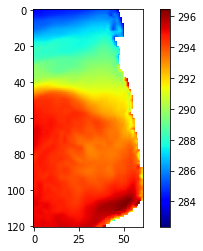

In [ ]:
plt.imshow(d1_T.values[12,:,:],cmap='jet')
plt.colorbar()

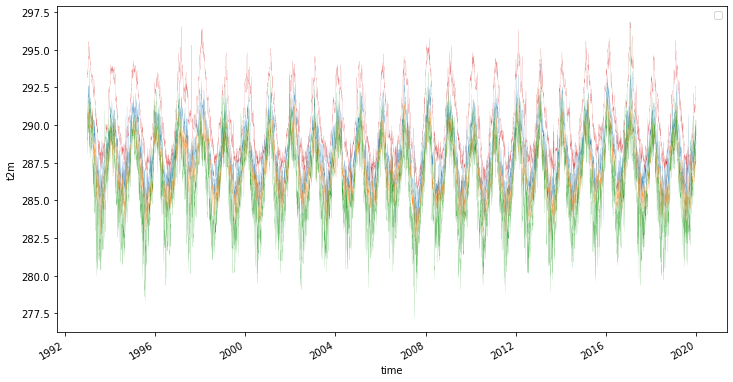

In [ ]:
T_Coquimbo= d1_T.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
T_Valparaiso= d1_T.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
T_Concepcion= d1_T.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
T_Mejillones= d1_T.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Coquimbo.plot(linewidth=0.1)
T_Valparaiso.plot(linewidth=0.1)
T_Concepcion.plot(linewidth=0.1)
T_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Coquimbo.to_dataframe(),T_Valparaiso.to_dataframe(),T_Concepcion.to_dataframe(),T_Mejillones.to_dataframe()],axis=1)
df_T.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_T.to_csv('T_Humboldt.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,291.162933,289.442596,290.832855,293.719269
1993-01-02,290.663544,289.370056,290.593597,293.391052
1993-01-03,290.425934,288.922028,289.667145,293.401215
1993-01-04,290.570740,288.066986,289.427887,293.407410
1993-01-05,290.411896,289.100861,290.368042,293.391754


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
T_H=d1_T.groupby('lat').mean('lon').to_dataframe().reset_index()
T_H.to_csv('Hovmoller_T_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Radiacion onda corta (Qsw)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/Humboldt/'
ifile = 'Humboldt_QSW.nc' # Elegir el archivo .nc
var='ssrd'
d1_Q= xr.open_dataset(ifile)
d1_Q=d1_Q.rename(name_dict={'longitude':'lon','latitude':'lat'}) # cambiar nombre de lat y lon
d1_Q= d1_Q[var] #seleccionar variable de interes
d1_Q=d1_Q.sel(lon=slice(-85,-70),lat=slice(-15,-45)) # recortar el xarray
d1_Q=d1_Q.reindex(lat=list(reversed(d1_Q.lat))) # Invertir valores de lat para qye queden iguales
d1_Q=d1_Q.assign_coords({"lon": d1_Q.lon + 360}) # cambiar coordenadas de lon
#d1_Q=d1_Q.sel(time=filtro_meses(d1_Q['time.month']))
d1_Q.values= d1_Q.values*indices # masking sobre tierra
d1_Q

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/DATA_RADIACION_ONDA_CORTA(QSW)/Humboldt


<xarray.DataArray 'ssrd' (time: 9861, lat: 121, lon: 61)>
array([[[1185860.625 , 1209394.625 , 1210076.375 , ...,          nan,
                  nan,          nan],
        [1213263.5   , 1195578.375 , 1154232.    , ...,          nan,
                  nan,          nan],
        [1184323.125 , 1147108.375 , 1086952.625 , ...,          nan,
                  nan,          nan],
        ...,
        [ 913815.5625,  883048.6875,  837922.25  , ...,          nan,
                  nan,          nan],
        [ 870203.0625,  851567.6875,  854146.75  , ...,          nan,
                  nan,          nan],
        [ 835694.1875,  843378.6875,  859021.8125, ...,          nan,
                  nan,          nan]],

       [[ 570306.5625,  560828.    ,  548814.625 , ...,          nan,
                  nan,          nan],
        [ 543080.875 ,  541596.5   ,  535098.4375, ...,          nan,
                  nan,          nan],
        [ 536417.5625,  539082.25  ,  534160.0625, ...,          nan,
                  nan,          nan],
...
        [ 954796.9375,  989070.8125, 1037345.5   , ...,          nan,
                  nan,          nan],
        [1002193.5   , 1037386.25  , 1073922.375 , ...,          nan,
                  nan,          nan],
        [1063375.875 , 1096128.875 , 1125700.875 , ...,          nan,
                  nan,          nan]],

       [[1201805.875 , 1195687.875 , 1186955.875 , ...,          nan,
                  nan,          nan],
        [1204245.5   , 1196810.375 , 1192032.875 , ...,          nan,
                  nan,          nan],
        [1208575.375 , 1201890.25  , 1200052.625 , ...,          nan,
                  nan,          nan],
        ...,
        [1064277.375 , 1073023.875 , 1089836.625 , ...,          nan,
                  nan,          nan],
        [1056595.    , 1060430.375 , 1059305.125 , ...,          nan,
                  nan,          nan],
        [1056679.375 , 1046624.25  , 1040038.1875, ...,          nan,
                  nan,          nan]]])
Coordinates:
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0

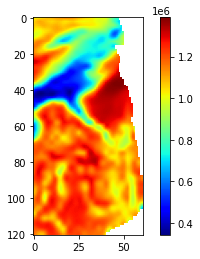

In [ ]:
plt.imshow(d1_Q.values[12,:,:],cmap='jet')
plt.colorbar()

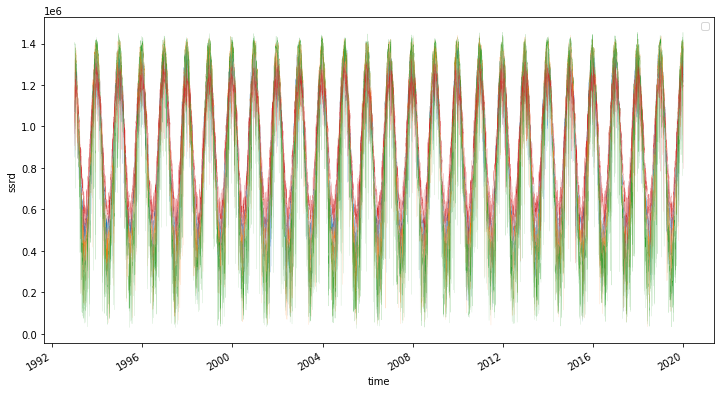

In [ ]:
Q_Coquimbo= d1_Q.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
Q_Valparaiso= d1_Q.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
Q_Concepcion= d1_Q.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
Q_Mejillones= d1_Q.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
Q_Coquimbo.plot(linewidth=0.1)
Q_Valparaiso.plot(linewidth=0.1)
Q_Concepcion.plot(linewidth=0.1)
Q_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_Q=pd.concat([Q_Coquimbo.to_dataframe(),Q_Valparaiso.to_dataframe(),Q_Concepcion.to_dataframe(),Q_Mejillones.to_dataframe()],axis=1)
df_Q.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_Q.to_csv('Q_Humboldt.csv',index=True,sep=',')
df_Q.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,1.261441e+06,1.199754e+06,1392644.750,1.064422e+06
1993-01-02,1.067140e+06,1.017330e+06,1396194.750,9.642774e+05
1993-01-03,8.516532e+05,1.247138e+06,1406791.875,1.059930e+06
1993-01-04,1.090441e+06,1.322851e+06,1393642.250,1.191630e+06
1993-01-05,1.126640e+06,1.200132e+06,1385164.000,1.104207e+06


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
Q_H=d1_Q.groupby('lat').mean('lon').to_dataframe().reset_index()
Q_H.to_csv('Hovmoller_Q_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Corrientes

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Corrientes/'
ifile = 'GLOBAL_REANALYSIS_PHY_Corrientes.nc' # Elegir el archivo .nc
d1_C = xr.open_dataset(ifile)
#d1_C=d1_C.sel(time=filtro_meses(d1_C['time.month']))
d1_C.lon.values[d1_C.lon.values < 0] = d1_C.lon.values[d1_C.lon.values < 0] + 360 # convertir a 0-360 ªE
lat2d, lon2d = d1_C['lat'].values,d1_C['lon'].values #vectores 2D lat y 2D lon

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Corrientes


In [ ]:
d1_C

<xarray.Dataset>
Dimensions:  (lon: 61, lat: 121, time: 9861)
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
Data variables:
    U        (time, lat, lon) float32 ...
    V        (time, lat, lon) float32 ...
Attributes: (12/15)
    product:                       GLOBAL_REANALYSIS_PHY_001_031
    producer:                      CMEMS - Global Monitoring and Forecasting ...
    area:                          Global
    quality_information_document:  http://marine.copernicus.eu/documents/QUID...
    Conventions:                   CF-1.6
    credit:                        E.U. Copernicus Marine Service Information...
    ...                            ...
    institution:                   Mercator Ocean
    product_user_manual:           http://marine.copernicus.eu/documents/PUM/...
    history:                       Creation 2022-Mar-05 02:35:00 GMT+0200
    title:                         Daily mean fields for product GLOBAL_REANA...
    source:                        Copernicus Marine Service
    dataset:                       global-reanalysis-phy-001-031-grepv2-daily

In [ ]:
tiempos= d1_C.time.values
tiempos

array(['1993-01-01T00:00:00.000000000', '1993-01-02T00:00:00.000000000',
       '1993-01-03T00:00:00.000000000', ...,
       '2019-12-29T00:00:00.000000000', '2019-12-30T00:00:00.000000000',
       '2019-12-31T00:00:00.000000000'], dtype='datetime64[ns]')

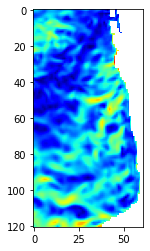

In [ ]:
plt.imshow(np.sqrt(d1_C.U.values[0,:,:]**2 + d1_C.V.values[0,:,:]**2), cmap='jet')

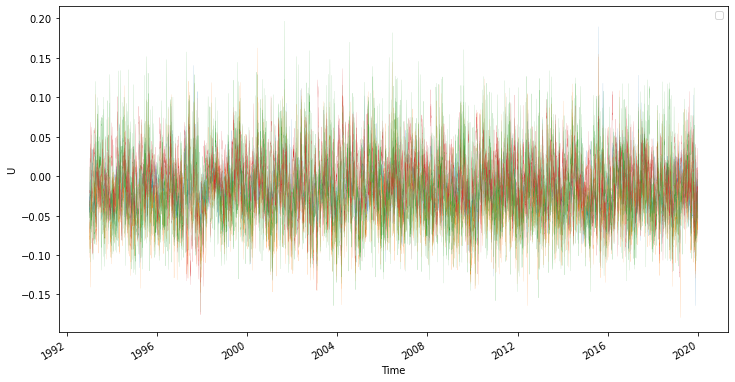

In [ ]:
U_Coquimbo= d1_C.sel(lon=-71.5+360,lat=-30).U.drop(['lat','lon','depth'])
U_Valparaiso= d1_C.sel(lon=-71.75+360,lat=-33).U.drop(['lat','lon','depth'])
U_Concepcion= d1_C.sel(lon=-73+360,lat=-36.5).U.drop(['lat','lon','depth'])
U_Mejillones= d1_C.sel(lon=-70.5+360,lat=-22.5).U.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
U_Coquimbo.plot(linewidth=0.1)
U_Valparaiso.plot(linewidth=0.1)
U_Concepcion.plot(linewidth=0.1)
U_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_U=pd.concat([U_Coquimbo.to_dataframe(),U_Valparaiso.to_dataframe(),U_Concepcion.to_dataframe(),U_Mejillones.to_dataframe()],axis=1)
df_U.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_U.to_csv('UO_Humboldt.csv',index=True,sep=',')
df_U.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,-0.050001,-0.103259,-0.097348,-0.071424
1993-01-02,-0.024575,-0.066294,-0.057620,-0.051563
1993-01-03,-0.007347,-0.055874,-0.032236,-0.034912
1993-01-04,-0.025101,-0.071890,-0.042335,-0.039393
1993-01-05,-0.042635,-0.077449,-0.053001,-0.034398


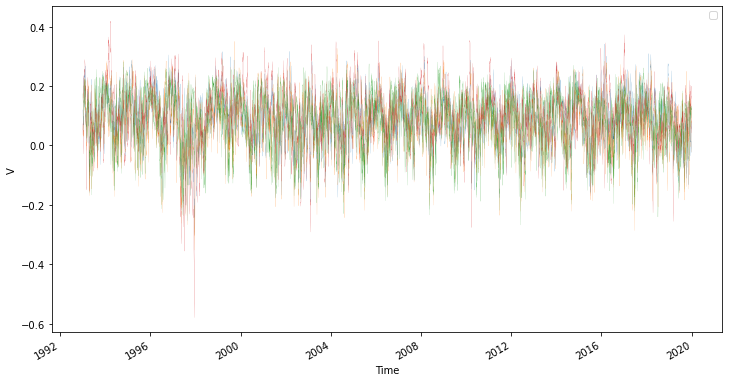

In [ ]:
V_Coquimbo= d1_C.sel(lon=-71.5+360,lat=-30).V.drop(['lat','lon','depth'])
V_Valparaiso= d1_C.sel(lon=-71.75+360,lat=-33).V.drop(['lat','lon','depth'])
V_Concepcion= d1_C.sel(lon=-73+360,lat=-36.5).V.drop(['lat','lon','depth'])
V_Mejillones= d1_C.sel(lon=-70.5+360,lat=-22.5).V.drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
V_Coquimbo.plot(linewidth=0.1)
V_Valparaiso.plot(linewidth=0.1)
V_Concepcion.plot(linewidth=0.1)
V_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_V=pd.concat([V_Coquimbo.to_dataframe(),V_Valparaiso.to_dataframe(),V_Concepcion.to_dataframe(),V_Mejillones.to_dataframe()],axis=1)
df_V.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_V.to_csv('VO_Humboldt.csv',index=True,sep=',')
df_V.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,0.120159,0.053084,0.174175,0.073346
1993-01-02,0.119701,0.052856,0.162215,0.041223
1993-01-03,0.084197,0.058952,0.152211,0.035163
1993-01-04,0.071519,0.080485,0.143372,0.052179
1993-01-05,0.071445,0.084612,0.151030,0.044182


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
U_H=d1_C.groupby('lat').mean('lon').U.drop('depth').to_dataframe().reset_index()
V_H=d1_C.groupby('lat').mean('lon').V.drop('depth').to_dataframe().reset_index()
U_H.to_csv('Hovmoller_UO_Humboldt.csv',sep=',')
V_H.to_csv('Hovmoller_VO_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SST

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_SST/'
var = 'SST' # elegir la variable de interes
ifile = 'OSTIA_SST.nc' # Elegir el archivo .nc
d1_SST = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_SST=d1_SST.sel(time=filtro_meses(d1_SST['time.month']))
d1_SST.lon.values[d1_SST.lon.values < 0] = d1_SST.lon.values[d1_SST.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SST

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_SST


<xarray.DataArray 'SST' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float64]
Coordinates:
  * lon      (lon) float64 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float64 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

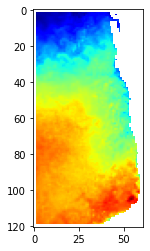

In [ ]:
plt.imshow(d1_SST.values[0,:,:],cmap='jet')

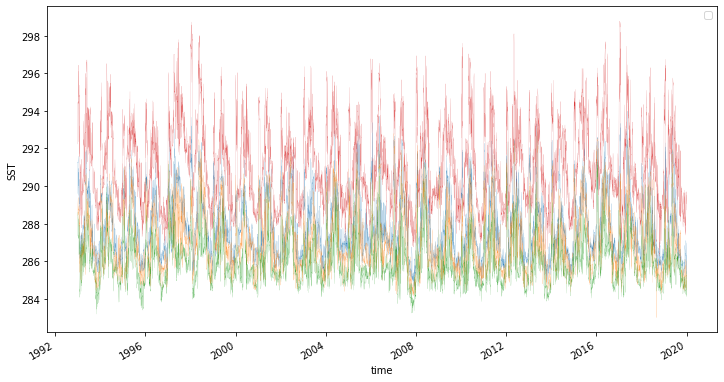

In [ ]:
T_Coquimbo= d1_SST.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
T_Valparaiso= d1_SST.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
T_Concepcion= d1_SST.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
T_Mejillones= d1_SST.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
T_Coquimbo.plot(linewidth=0.1)
T_Valparaiso.plot(linewidth=0.1)
T_Concepcion.plot(linewidth=0.1)
T_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_T=pd.concat([T_Coquimbo.to_dataframe(),T_Valparaiso.to_dataframe(),T_Concepcion.to_dataframe(),T_Mejillones.to_dataframe()],axis=1)
df_T.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_T.to_csv('SST_Humboldt.csv',index=True,sep=',')
df_T.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,289.604992,288.432501,287.344991,292.237484
1993-01-02,290.885003,288.697485,288.155003,294.217478
1993-01-03,291.235001,289.132483,288.162494,294.422471
1993-01-04,291.279998,289.144982,288.609995,294.442460
1993-01-05,291.227506,289.314983,288.167487,294.402470


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SST_H=d1_SST.groupby('lat').mean('lon').to_dataframe().reset_index()
SST_H.to_csv('Hovmoller_SST_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Salinidad

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_SSS/'
var = 'SSS' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_PHY_SSS.nc' # Elegir el archivo .nc
d1_S = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_S=d1_S.sel(time=filtro_meses(d1_S['time.month']))
d1_S.lon.values[d1_S.lon.values < 0] = d1_S.lon.values[d1_S.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_S

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_SSS


<xarray.DataArray 'SSS' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

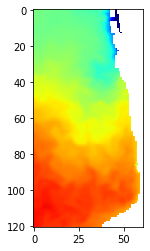

In [ ]:
plt.imshow(d1_S.values[0,:,:],cmap='jet',vmin=32, vmax=36)

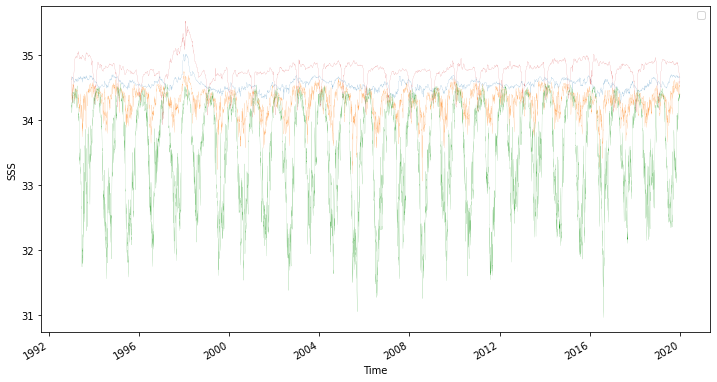

In [ ]:
S_Coquimbo= d1_S.sel(lon=-71.5+360,lat=-30).drop(['lat','lon','depth'])
S_Valparaiso= d1_S.sel(lon=-71.75+360,lat=-33).drop(['lat','lon','depth'])
S_Concepcion= d1_S.sel(lon=-73+360,lat=-36.5).drop(['lat','lon','depth'])
S_Mejillones= d1_S.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
S_Coquimbo.plot(linewidth=0.1)
S_Valparaiso.plot(linewidth=0.1)
S_Concepcion.plot(linewidth=0.1)
S_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_S=pd.concat([S_Coquimbo.to_dataframe(),S_Valparaiso.to_dataframe(),S_Concepcion.to_dataframe(),S_Mejillones.to_dataframe()],axis=1)
df_S.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_S.to_csv('S_Humboldt.csv',index=True,sep=',')
df_S.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,34.627457,34.411289,34.176971,34.650833
1993-01-02,34.627342,34.403011,34.226311,34.656666
1993-01-03,34.621647,34.378674,34.208591,34.659897
1993-01-04,34.619003,34.370926,34.193100,34.659180
1993-01-05,34.622150,34.382896,34.222137,34.646233


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
SSS_H=d1_S.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
SSS_H.to_csv('Hovmoller_S_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Oxigeno

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Oxigeno/'
var = 'o2' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_O = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_O=d1_O.sel(time=filtro_meses(d1_O['time.month']))
d1_O.lon.values[d1_O.lon.values < 0] = d1_O.lon.values[d1_O.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_O

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Oxigeno


<xarray.DataArray 'o2' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Dissolved Oxygen
    standard_name:  mole_concentration_of_dissolved_molecular_oxygen_in_sea_w...
    units:          mmol m-3
    unit_long:      millimoles of Oxygen per cubic meter
    valid_min:      0.24998258
    valid_max:      529.78735
    _ChunkSizes:    [  1  15 137 288]

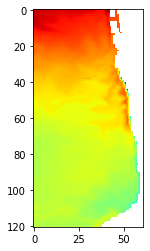

In [ ]:
plt.imshow(d1_O.values[0,:,:],cmap='jet')

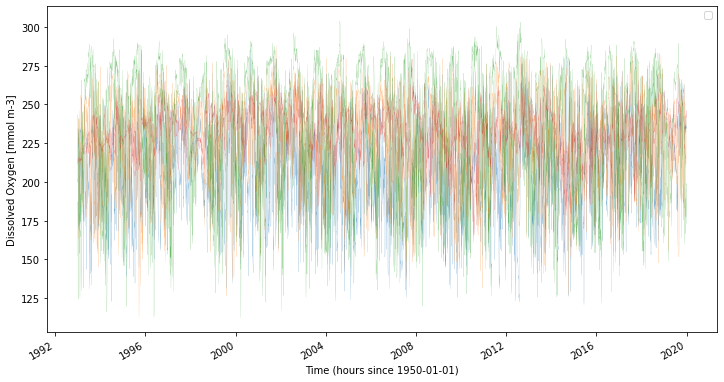

In [ ]:
O_Coquimbo= d1_O.sel(lon=-71.5+360,lat=-30).drop(['lat','lon','depth'])
O_Valparaiso= d1_O.sel(lon=-71.75+360,lat=-33).drop(['lat','lon','depth'])
O_Concepcion= d1_O.sel(lon=-73+360,lat=-36.5).drop(['lat','lon','depth'])
O_Mejillones= d1_O.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
O_Coquimbo.plot(linewidth=0.1)
O_Valparaiso.plot(linewidth=0.1)
O_Concepcion.plot(linewidth=0.1)
O_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_O=pd.concat([O_Coquimbo.to_dataframe(),O_Valparaiso.to_dataframe(),O_Concepcion.to_dataframe(),O_Mejillones.to_dataframe()],axis=1)
df_O.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_O.to_csv('O_Humboldt.csv',index=True,sep=',')
df_O.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01 12:00:00,202.188889,210.877014,152.029800,212.078323
1993-01-02 12:00:00,199.680634,214.014740,158.117416,212.069473
1993-01-03 12:00:00,214.730560,230.400146,171.179153,213.603928
1993-01-04 12:00:00,233.788925,243.382172,187.156281,214.807541
1993-01-05 12:00:00,234.752808,234.757858,184.527664,215.226776


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
O_H=d1_O.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
O_H.to_csv('Hovmoller_O_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Clorofila

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Oxigeno/'
var = 'chl' # elegir la variable de interes
ifile = 'GLOBAL_REANALYSIS_BIO.nc' # Elegir el archivo .nc
d1_CHL = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_CHL=d1_CHL.sel(time=filtro_meses(d1_CHL['time.month']))
d1_CHL.lon.values[d1_CHL.lon.values < 0] = d1_CHL.lon.values[d1_CHL.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_CHL

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/SOM_Univariado_Humboldt_Oxigeno


<xarray.DataArray 'chl' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
    depth    float32 ...
  * time     (time) datetime64[ns] 1993-01-01T12:00:00 ... 2019-12-31T12:00:00
Attributes:
    long_name:      Total Chlorophyll
    standard_name:  mass_concentration_of_chlorophyll_a_in_sea_water
    units:          mg m-3
    unit_long:      milligram of Chlorophyll per cubic meter
    valid_min:      0.0026485976
    valid_max:      14.423477
    _ChunkSizes:    [  1  15 137 288]

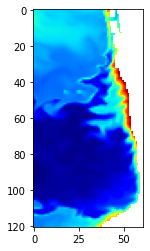

In [ ]:
plt.imshow(np.log10(d1_CHL.values[0,:,:]),cmap='jet')

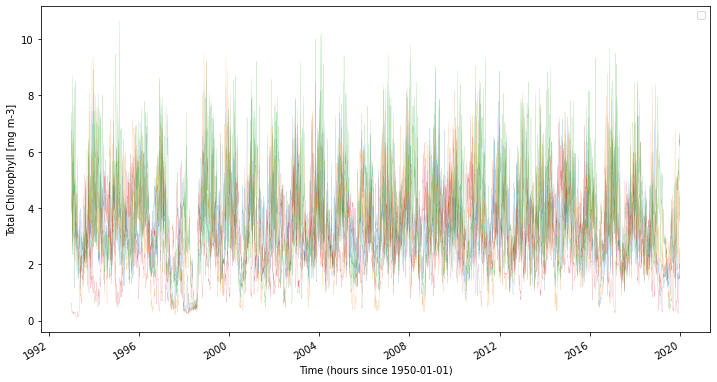

In [ ]:
C_Coquimbo= d1_CHL.sel(lon=-71.5+360,lat=-30).drop(['lat','lon','depth'])
C_Valparaiso= d1_CHL.sel(lon=-71.75+360,lat=-33).drop(['lat','lon','depth'])
C_Concepcion= d1_CHL.sel(lon=-73+360,lat=-36.5).drop(['lat','lon','depth'])
C_Mejillones= d1_CHL.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon','depth'])
plt.figure(figsize=(12,6))
C_Coquimbo.plot(linewidth=0.1)
C_Valparaiso.plot(linewidth=0.1)
C_Concepcion.plot(linewidth=0.1)
C_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Coquimbo.to_dataframe(),C_Valparaiso.to_dataframe(),C_Concepcion.to_dataframe(),C_Mejillones.to_dataframe()],axis=1)
df_C.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_C.to_csv('CHL_Humboldt.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01 12:00:00,5.924049,5.171600,4.319600,0.535389
1993-01-02 12:00:00,6.069192,5.445570,4.025855,0.621575
1993-01-03 12:00:00,6.754938,6.275014,4.698885,0.592965
1993-01-04 12:00:00,6.677491,6.358759,6.193137,0.531370
1993-01-05 12:00:00,5.511280,5.207018,6.880192,0.486081


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_CHL.groupby('lat').mean('lon').drop('depth').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_CHL_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## SSH

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Humboldt/Data_anual/'
var = 'SSH' # elegir la variable de interes
ifile='GLOBAL_REANALYSIS_PHY_SSH.nc'
d1_SSH = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
d1_SSH=d1_SSH.transpose('time', 'lat', 'lon')
#d1_SSH=d1_SSH.sel(time=filtro_meses(d1_SSH['time.month']))
d1_SSH.lon.values[d1_SSH.lon.values < 0] = d1_SSH.lon.values[d1_SSH.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_SSH

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_SSH/Humboldt/Data_anual


<xarray.DataArray 'SSH' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float32]
Coordinates:
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31

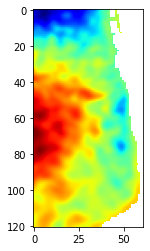

In [ ]:
plt.imshow(d1_SSH[0,:,:].values,cmap='jet')

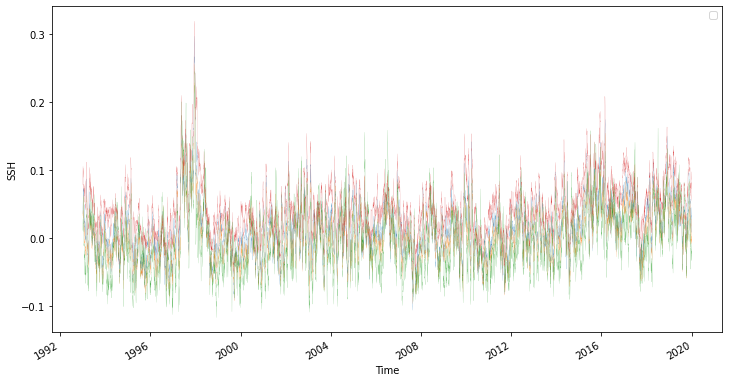

In [ ]:
C_Coquimbo= d1_SSH.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
C_Valparaiso= d1_SSH.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
C_Concepcion= d1_SSH.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
C_Mejillones= d1_SSH.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Coquimbo.plot(linewidth=0.1)
C_Valparaiso.plot(linewidth=0.1)
C_Concepcion.plot(linewidth=0.1)
C_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Coquimbo.to_dataframe(),C_Valparaiso.to_dataframe(),C_Concepcion.to_dataframe(),C_Mejillones.to_dataframe()],axis=1)
df_C.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_C.to_csv('SSH_Humboldt.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,0.036009,0.033068,0.011195,0.078538
1993-01-02,0.043599,0.036780,0.023128,0.095087
1993-01-03,0.055547,0.040692,0.028114,0.105401
1993-01-04,0.051622,0.029024,0.011638,0.090006
1993-01-05,0.060572,0.032038,0.009467,0.089386


In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
C_H=d1_SSH.groupby('lat').mean('lon').to_dataframe().reset_index()
C_H.to_csv('Hovmoller_SSH_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Rotor de viento

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Humboldt/Data_anual/'
var = 'wind_stress_curl' # elegir la variable de interes
ifile='GLOBAL_Rotor_Viento.nc'
d1_Rotor = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Rotor=d1_Rotor.sel(time=filtro_meses(d1_Rotor['time.month']))
d1_Rotor.lon.values[d1_Rotor.lon.values < 0] = d1_Rotor.lon.values[d1_Rotor.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Rotor

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Rotor_Viento/Humboldt/Data_anual


<xarray.DataArray 'wind_stress_curl' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0

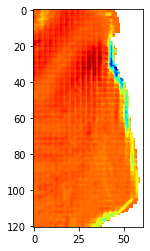

In [ ]:
plt.imshow(d1_Rotor.isel(time=0).values,cmap='jet')

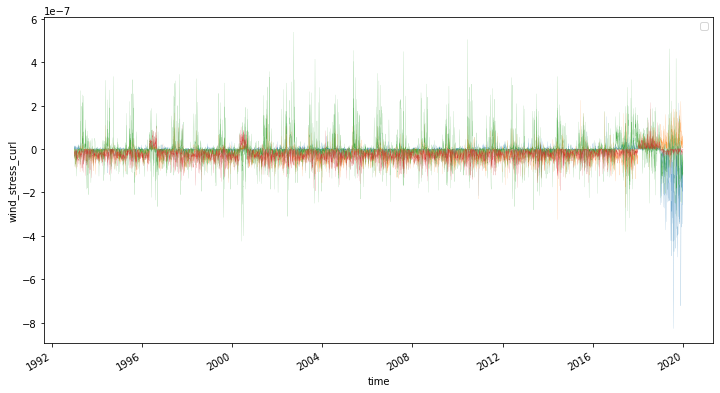

In [ ]:
C_Coquimbo= d1_Rotor.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
C_Valparaiso= d1_Rotor.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
C_Concepcion= d1_Rotor.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
C_Mejillones= d1_Rotor.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Coquimbo.plot(linewidth=0.1)
C_Valparaiso.plot(linewidth=0.1)
C_Concepcion.plot(linewidth=0.1)
C_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Coquimbo.to_dataframe(),C_Valparaiso.to_dataframe(),C_Concepcion.to_dataframe(),C_Mejillones.to_dataframe()],axis=1)
df_C.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_C.to_csv('Rotor_Humboldt.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,0.000000e+00,-3.492460e-08,-8.009374e-08,-3.469177e-08
1993-01-02,5.122274e-09,-5.122274e-09,9.778887e-09,-2.468005e-08
1993-01-03,0.000000e+00,-9.778887e-09,5.122274e-09,-1.001172e-08
1993-01-04,1.490116e-08,-2.514571e-08,-2.514571e-08,-2.211891e-08
1993-01-05,9.778887e-09,-4.516914e-08,-4.470348e-08,-1.513399e-08


In [ ]:
np.nanmin(d1_Rotor.values),np.nanmax(d1_Rotor.values)

(-3.6749988794326782e-06, 3.7048012018203735e-06)

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
R_H=d1_Rotor.groupby('lat').mean('lon').to_dataframe().reset_index()
#R_H
R_H.to_csv('Hovmoller_Rotor_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


## Estres viento

In [2]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Humboldt/Data_anual/'
var = 'wind_stress' # elegir la variable de interes
ifile='GLOBAL_Estres_Viento.nc'
d1_Estres = xr.open_dataset(ifile)[var] # filtrar la variable del archivo de interes
#d1_Estres=d1_Estres.sel(time=filtro_meses(d1_Estres['time.month']))
d1_Estres.lon.values[d1_Estres.lon.values < 0] = d1_Estres.lon.values[d1_Estres.lon.values < 0] + 360 # convertir a 0-360 ªE
d1_Estres

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/SOM/GLOBAL_REANALYSIS_PHY_Estres_Viento/Humboldt/Data_anual


<xarray.DataArray 'wind_stress' (time: 9861, lat: 121, lon: 61)>
[72784041 values with dtype=float64]
Coordinates:
  * time     (time) datetime64[ns] 1993-01-01 1993-01-02 ... 2019-12-31
  * lat      (lat) float32 -45.0 -44.75 -44.5 -44.25 ... -15.5 -15.25 -15.0
  * lon      (lon) float32 275.0 275.2 275.5 275.8 ... 289.2 289.5 289.8 290.0

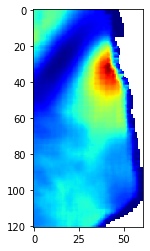

In [3]:
plt.imshow(d1_Estres.isel(time=0).values,cmap='jet')

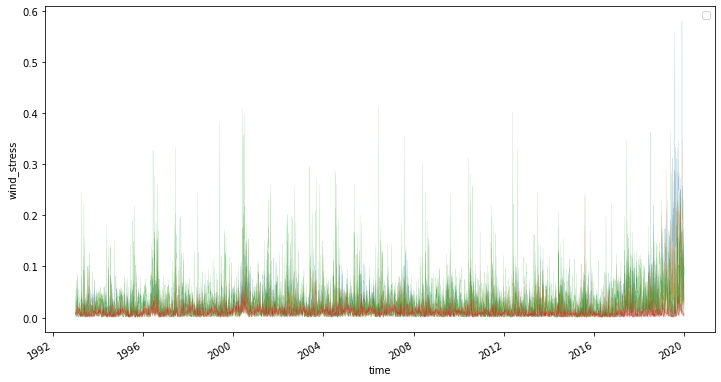

In [ ]:
C_Coquimbo= d1_Estres.sel(lon=-71.5+360,lat=-30).drop(['lat','lon'])
C_Valparaiso= d1_Estres.sel(lon=-71.75+360,lat=-33).drop(['lat','lon'])
C_Concepcion= d1_Estres.sel(lon=-73+360,lat=-36.5).drop(['lat','lon'])
C_Mejillones= d1_Estres.sel(lon=-70.5+360,lat=-22.5).drop(['lat','lon'])
plt.figure(figsize=(12,6))
C_Coquimbo.plot(linewidth=0.1)
C_Valparaiso.plot(linewidth=0.1)
C_Concepcion.plot(linewidth=0.1)
C_Mejillones.plot(linewidth=0.1)
plt.legend()

In [ ]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
df_C=pd.concat([C_Coquimbo.to_dataframe(),C_Valparaiso.to_dataframe(),C_Concepcion.to_dataframe(),C_Mejillones.to_dataframe()],axis=1)
df_C.columns=['Coquimbo','Valparaiso','Concepcion','Mejillones']
df_C.to_csv('Estres_Humboldt.csv',index=True,sep=',')
df_C.head()

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia


,Coquimbo,Valparaiso,Concepcion,Mejillones
time,,,,
1993-01-01,0.013575,0.012150,0.055252,0.009575
1993-01-02,0.004074,0.003952,0.031199,0.009125
1993-01-03,0.002199,0.003574,0.013124,0.007450
1993-01-04,0.006300,0.012924,0.015873,0.008875
1993-01-05,0.012676,0.017599,0.040152,0.008875


In [4]:
%cd '/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia/'
E_H=d1_Estres.groupby('lat').mean('lon').to_dataframe().reset_index()
E_H.to_csv('Hovmoller_Estres_Humboldt.csv',sep=',')

/content/gdrive/MyDrive/Doctorado Tesis/Scripts/Climatologia
